In [25]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from pyod.models.hbos import HBOS
from pyod.utils.data import evaluate_print

In [26]:
df=pd.read_csv("./invisily_service_access_logs_07Sep20.csv")

In [27]:
#display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
df.head()

,id,agent_id,client_physical_ip,client_pseudo_ip,service_id,service_physical_ip,service_pseudo_ip,client_tx_bytes,service_tx_bytes,difference_bytes,createdAt,updatedAt,log_start_time,log_end_time
0,26,7067,103.255.5.103,10.0.1.2,701,192.168.3.18,10.0.1.4,19347,52032,32685,2020-08-27 11:51:34,2020-08-27 11:51:34,1598508692,1598509007
1,32,7096,111.119.178.162,10.0.1.194,701,192.168.3.18,10.0.1.196,55508,137447,81939,2020-08-27 11:51:34,2020-08-27 11:51:34,1598509662,1598509776
2,48,7238,39.53.107.112,10.0.0.2,700,192.168.3.1,10.0.0.3,65615,505399,439784,2020-08-27 11:51:34,2020-08-27 11:51:34,1598507738,1598510917
3,74,7352,118.107.131.76,10.0.0.194,701,192.168.3.18,10.0.0.196,14768,77408,62640,2020-08-27 11:51:34,2020-08-27 11:51:34,1598510653,1598511031
4,82,7380,110.38.129.187,10.1.0.66,830,172.16.1.220,10.1.0.72,94493,116133,21640,2020-08-27 12:13:03,2020-08-27 12:13:03,1598508889,1598510156


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1602 non-null   int64 
 1   agent_id             1602 non-null   int64 
 2   client_physical_ip   1602 non-null   object
 3   client_pseudo_ip     1602 non-null   object
 4   service_id           1602 non-null   int64 
 5   service_physical_ip  1602 non-null   object
 6   service_pseudo_ip    1602 non-null   object
 7   client_tx_bytes      1602 non-null   int64 
 8   service_tx_bytes     1602 non-null   int64 
 9   difference_bytes     1602 non-null   int64 
 10  createdAt            1602 non-null   object
 11  updatedAt            1602 non-null   object
 12  log_start_time       1602 non-null   int64 
 13  log_end_time         1602 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 175.3+ KB


In [30]:
df.describe()

,id,agent_id,service_id,client_tx_bytes,service_tx_bytes,difference_bytes,log_start_time,log_end_time
count,1602.000000,1602.000000,1602.000000,1.602000e+03,1.602000e+03,1.602000e+03,1.602000e+03,1.602000e+03
mean,10016.644819,7268.179775,757.602372,6.526405e+05,8.844353e+06,8.719485e+06,1.598888e+09,1.598890e+09
std,5986.330058,112.044306,52.831020,3.325140e+06,6.245574e+07,6.117173e+07,2.208976e+05,2.209020e+05
min,26.000000,7008.000000,700.000000,4.000000e+01,4.000000e+01,0.000000e+00,1.598508e+09,1.598509e+09
25%,4666.500000,7192.000000,701.000000,1.077100e+04,2.489875e+04,1.215375e+04,1.598624e+09,1.598627e+09
50%,10066.000000,7297.000000,745.000000,3.684600e+04,1.230135e+05,7.220900e+04,1.598938e+09,1.598941e+09
75%,15474.500000,7367.000000,800.000000,1.718010e+05,7.311465e+05,5.909708e+05,1.599052e+09,1.599054e+09
max,19984.000000,7401.000000,839.000000,5.285412e+07,1.172291e+09,1.148977e+09,1.599219e+09,1.599220e+09


In [31]:
df.dtypes

id                      int64
agent_id                int64
client_physical_ip     object
client_pseudo_ip       object
service_id              int64
service_physical_ip    object
service_pseudo_ip      object
client_tx_bytes         int64
service_tx_bytes        int64
difference_bytes        int64
createdAt              object
updatedAt              object
log_start_time          int64
log_end_time            int64
dtype: object

In [32]:
df.groupby('agent_id').count()

,id,client_physical_ip,client_pseudo_ip,service_id,service_physical_ip,service_pseudo_ip,client_tx_bytes,service_tx_bytes,difference_bytes,createdAt,updatedAt,log_start_time,log_end_time
agent_id,,,,,,,,,,,,,
7008,6,6,6,6,6,6,6,6,6,6,6,6,6
7014,1,1,1,1,1,1,1,1,1,1,1,1,1
7026,17,17,17,17,17,17,17,17,17,17,17,17,17
7032,2,2,2,2,2,2,2,2,2,2,2,2,2
7039,6,6,6,6,6,6,6,6,6,6,6,6,6
7048,107,107,107,107,107,107,107,107,107,107,107,107,107
7067,22,22,22,22,22,22,22,22,22,22,22,22,22
7072,3,3,3,3,3,3,3,3,3,3,3,3,3
7079,2,2,2,2,2,2,2,2,2,2,2,2,2


Agent id's with maimum counts <br>
Agent Id.....Count <br>
  7297  .....    215 <br>
  7238  .....    198 <br>
  7380  .....    163 <br>
  7367  .....    132 <br>
  7048  .....    107

### select agent

In [33]:
def select_agent(df, agent_id):
    df_selected = df.loc[df['agent_id'] == agent_id]
    return df_selected

### show service ids

In [34]:
def show_unique_service_ids(df, agent_id):
    df_agent_selected = select_agent(df, agent_id)
    service_ids = df_agent_selected.groupby('service_id')['service_id'].first()
    print(service_ids)
 

### select service id

In [35]:
def select_service(df,service_id):
    df_selected = df.loc[df['service_id'] == service_id]
    return df_selected

### select features

In [36]:
def select_features(df, feature_list):
    df_selected = df[feature_list]
    return df_selected

In [13]:
features = ['difference_bytes']

### Normalize data

In [37]:
def normalize_data(df):
    
    """ Method for normalizing data using zscore
    
    Args:
        df (dataframe)
        
    Attributes:
        df (dataframe): original dataframe with selected rows and columns
        X (dataframe): consists of copy of df for processing
    
    Returns:
        X(dataframe): Normalized dataframe
        
    """
    
    X = df
    for col in X:
        X[col] = stats.zscore(X[col])
        
    return X

In [80]:
def outlier_detection_hbos(df,contamination, service_name, agent_id, df_created_at):

    clf_name = 'HBOS'
    clf = HBOS(contamination=contamination)
    
    clf.fit(df)
    y_test_pred = clf.predict(df)    
    
    F = plt.gcf()
    Size = F.get_size_inches()
    F.set_size_inches(Size[0]*3.5, Size[1]*2.5, forward=True) 
    
    print("Predicted Values " , y_test_pred)
    cluster = []
    outliers = []
    
    for i in range(len(df)):
        if y_test_pred[i] == 0:
            cluster.append((df.iloc[i],df_created_at.iloc[i]))
        elif y_test_pred[i] == 1:
            outliers.append((df.iloc[i], df_created_at.iloc[i]))
            
            

    if len(cluster) > 0:
        x = []
        y = []
        for i in range(len(cluster)):
            x.append(cluster[i][1])
            y.append(cluster[i][0]) # append labels 
            
        plt.scatter(x, y,c='b', cmap='Paired')
        print("Number od inliers : ", len(cluster))
        
        
    
    if len(outliers) > 0:    
        # outliers
        x = []
        y = []
        for i in range(len(outliers)):
            x.append(outliers[i][1])
            y.append(outliers[i][0])
        plt.scatter(x, y,c='r', marker = '*', cmap='Paired') #outlier
        print("Number of outliers : ", len(outliers))
        
    plot_title = "Agent ID : " + str(agent_id) + " Service ID : " + str(service_id) + " Service Name : " + service_name 
    plt.title(plot_title)
    plt.ylabel("Difference Bytes")
    plt.xlabel("Created At")
    plt.gcf().autofmt_xdate()
    

In [81]:
def hbos_workflow(df, agent_id, service_id, feature_list, contamination):
    
    """ Method implementing the whole pipleline of work work dbscan
    
    Args:
        df (dataframe): unprocessed data
        epsilon (float): The maximum distance between two samples for one to be 
                    considered as in the neighborhood of the other
        min_samples (int):The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
                        This includes the point itself
        features (list): names of features needed
        
    Returns: None
        
    """ 
    if agent_id == "all" or agent_id == "All" or agent_id == "ALL" or agent_id == "any" or agent_id == "Any":
        pass
    else:
        df = select_agent(df, agent_id) # select dataframe for selected agent
    df = select_service(df,service_id)
    df_created_at = df['createdAt']
    df = select_features(df, feature_list)
    df = normalize_data(df)
    if service_id == 700:
        service_name = "Redmine"
    elif service_id == 701:
        service_name = "Attendance"
    elif service_id == 702:
        service_name = "GitLab"
    else:
        service_name = "Not specified"

    #     outlier_detection_dbscan(epsilon, min_samples, df, df_created_at, service_name, agent_id)
    outlier_detection_hbos(df,contamination, service_name, agent_id, df_created_at)

    
    
#     df = filter_ip(df)
#     df = select_features(df,features)
#     df = normalize_data(df)
#     outlier_detection_dbscan(epsilon, min_samples, df)
    

Predicted Values  [0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number od inliers :  56
Number of outliers :  5


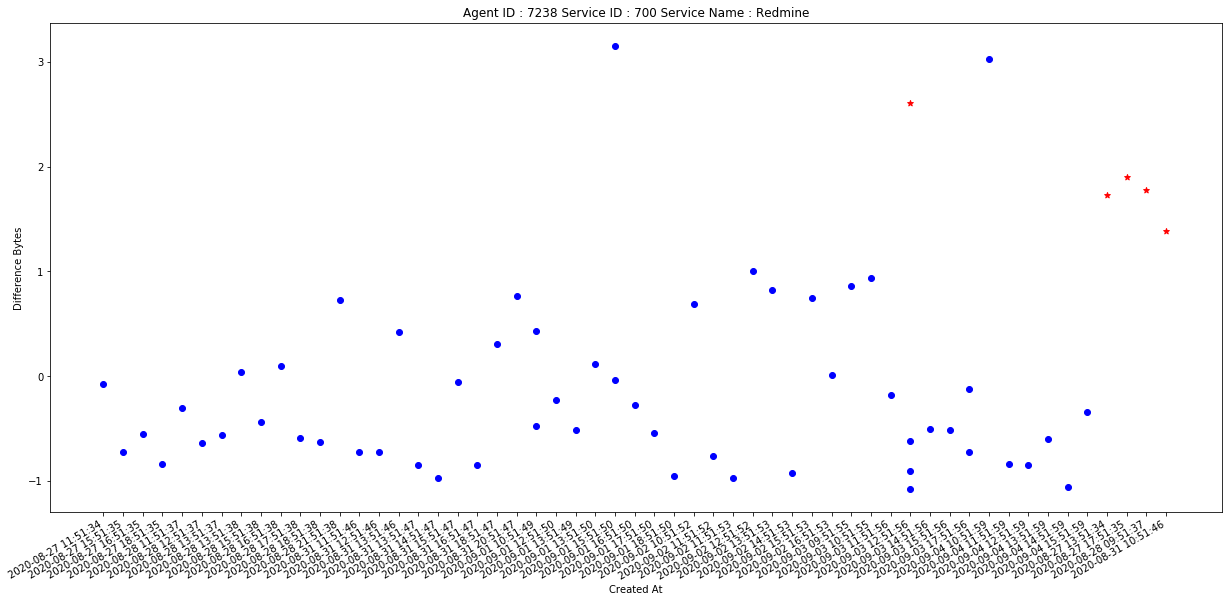

In [82]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.09
hbos_workflow(df, agent_id, service_id, feature_list, contamination)

Predicted Values  [0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number od inliers :  56
Number of outliers :  5


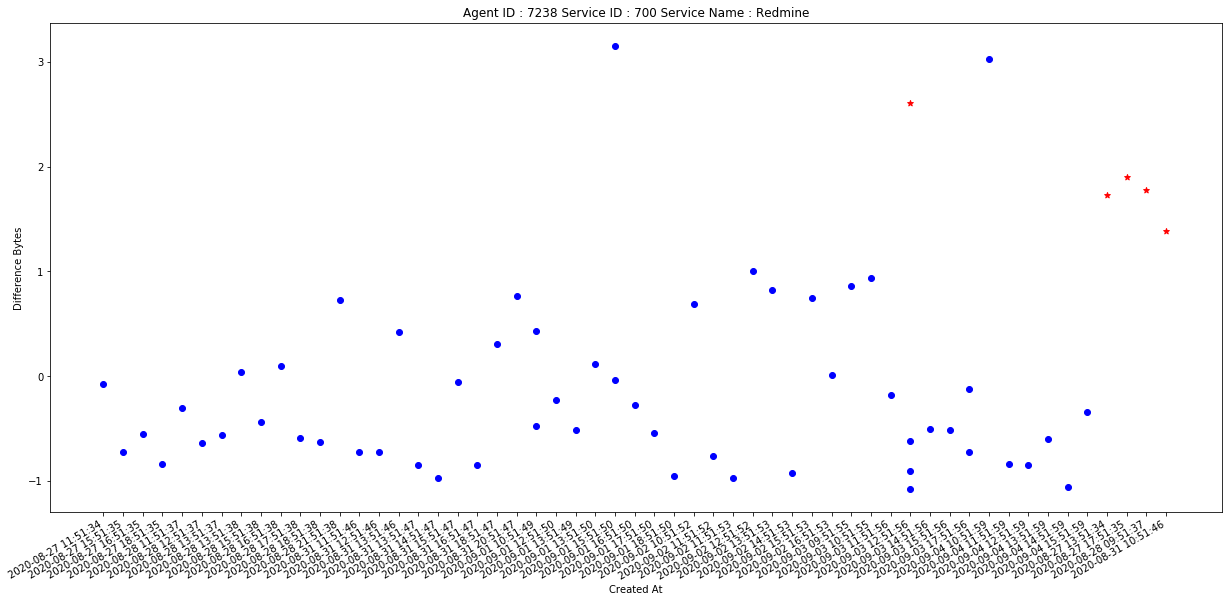

In [83]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.1
hbos_workflow(df, agent_id, service_id, feature_list, contamination)

Predicted Values  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number od inliers :  61


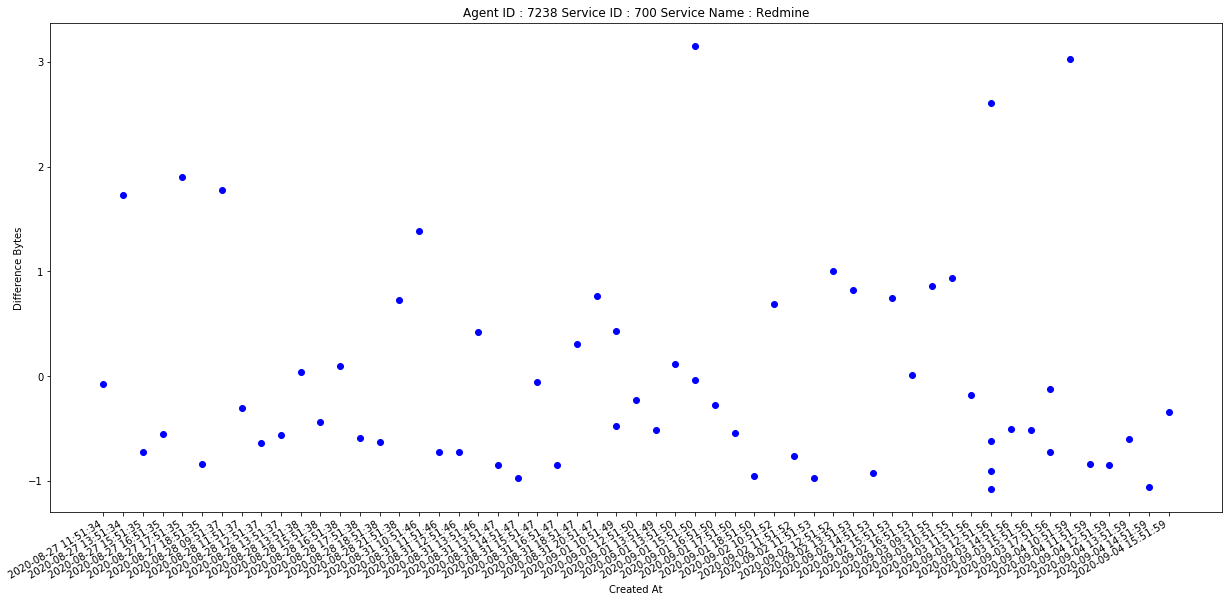

In [84]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.01
hbos_workflow(df, agent_id, service_id, feature_list, contamination)

Predicted Values  [0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
Number od inliers :  54
Number of outliers :  7


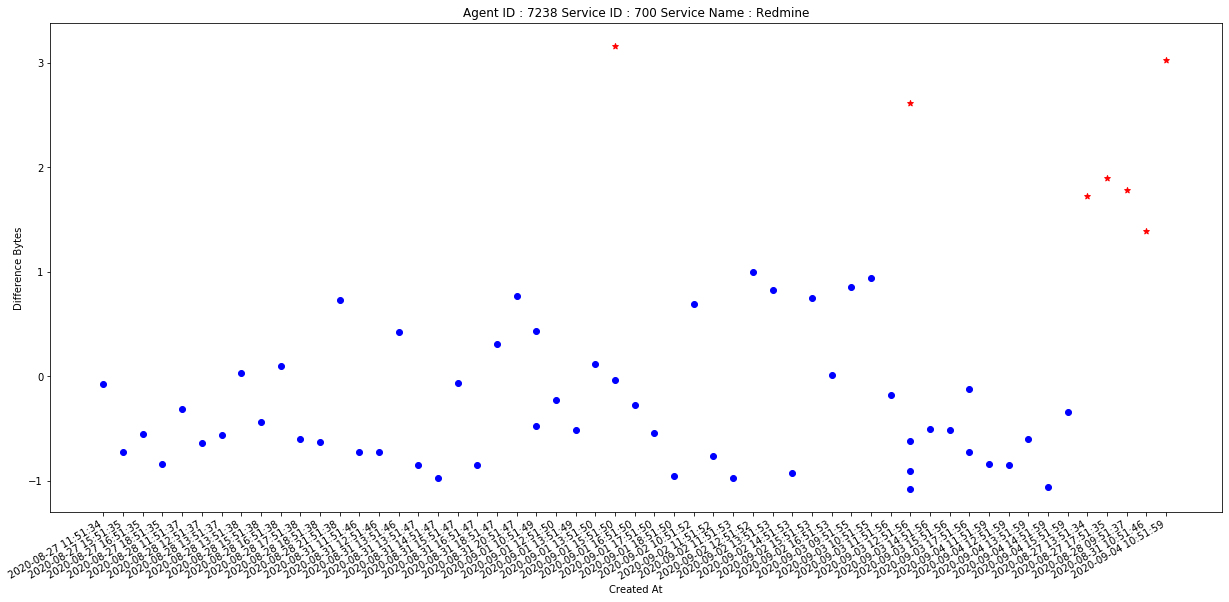

In [85]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.15
hbos_workflow(df, agent_id, service_id, feature_list, contamination)

Predicted Values  [0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
Number od inliers :  51
Number of outliers :  10


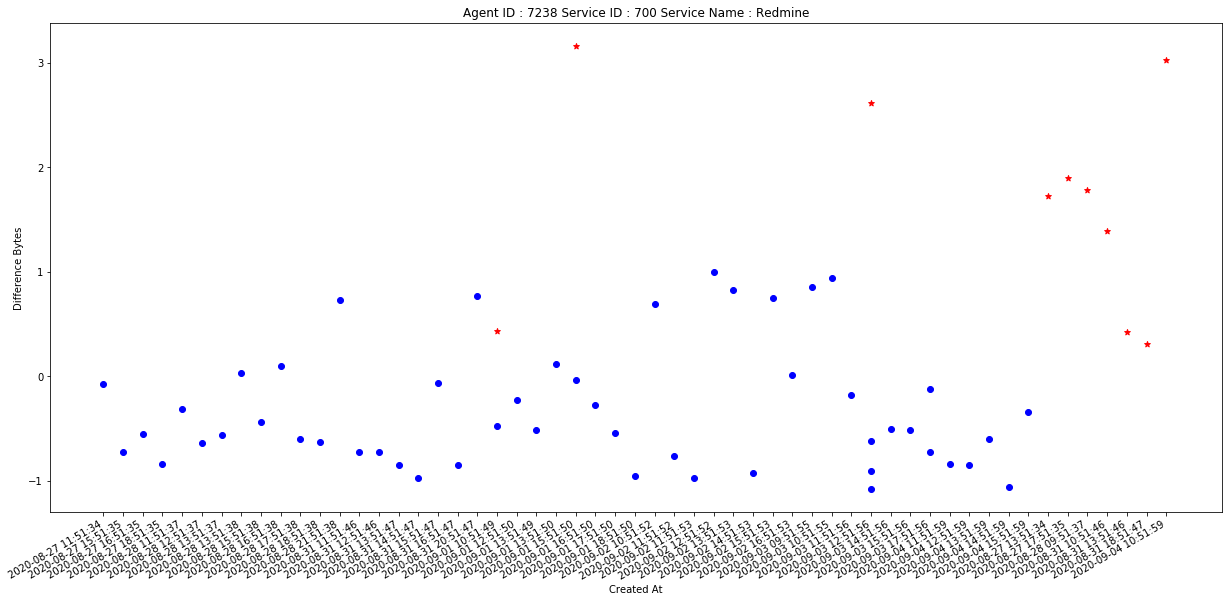

In [86]:
agent_id = 7238
service_id = 700
feature_list = ['difference_bytes']
contamination = 0.2
hbos_workflow(df, agent_id, service_id, feature_list, contamination)